# Objectives
YW
* scrape a website for relevant information, store that information to a dataframe and save that dataframe as a csv file
* load in a dataframe and do the following
    * calculate the zscores of a given column
    * calculate the zscores of a point from a given column in the dataframe
    * calculate and plot the pmf and cdf of another column

# Part 1 - Webscraping
* use the following url scrape the first page of results
* for each item get the name of the item
* store the names to a dataframe and save that dataframe to csv then display
    * store the dataframe in the `data` folder in the repo
    * name the file `part1.csv` and make sure that when you write it you set `index=False`
* the head of the dataframe

* it should match the following
<img src="solutions/images/part1.png"/>

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
url = "https://www.petsmart.com/dog/treats/dental-treats/#page_name=flyout&category=dog&cta=dentaltreat"

In [3]:
# scrape the names of the items on the webpage above
soup = BeautifulSoup(requests.get(url).content, 'html.parser')
soup.prettify
container = soup.find('div', class_='search-result-content')
title = container.find_all('h3')
title_lst = [i.text for i in title]

In [4]:
# load the data into a dataframe file
df = pd.DataFrame(title_lst)
df.columns = ['name']

In [5]:
# save the data as a csv file
df.to_csv('data/part1.csv', index=False)

In [6]:
# display df.head()
df.head()

,name
0,Greenies Regular Dental Dog Treats
1,Greenies Teenie Dental Dog Treats
2,Greenies Large Dental Dog Treats
3,Authority® Dental & DHA Stick Puppy Treats Par...
4,Greenies Petite Dental Dog Treats


# Part 2

load in the csv file located in the `data` folder called `part2.csv`

create a function that calculates the zscores of an array

then calculate the zscores for each column in part2.csv and add them as columns

See below for final result

<img src="solutions/images/part2_df_preview.png"/>

In [7]:
import numpy as np

In [8]:
# load in the dataframe, notice it only contains columns salaries, NPS Score, eventOutcome
df2 = pd.read_csv('data/part2.csv')

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
salaries        5000 non-null float64
NPS Score       5000 non-null float64
eventOutcome    5000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [10]:
def zscores(arr):
    """
    write a function that calculates 
    the zscores of a numpy arr, arr.
    """
    zs = []
    for i in arr:
        z = (i-arr.mean()) / arr.std()
        zs.append(z)
    return zs

In [11]:
# calculate the zscore for each column and store them as a new column with the names used above
salaries_zscores = zscores(np.array(df2['salaries']))
NPS_zscores = zscores(np.array(df2['NPS Score']))
eventOutcome_zscores = zscores(np.array(df2['eventOutcome']))

In [12]:
df2['salaries_zscores'] = salaries_zscores
df2['NPS Score_zscores'] = NPS_zscores
df2['eventOutcome_zscores'] = eventOutcome_zscores
df2.head()

,salaries,NPS Score,eventOutcome,salaries_zscores,NPS Score_zscores,eventOutcome_zscores
0,44112.0,-7.0,1,-1.460301,-0.913613,-1.103276
1,46777.0,-12.0,2,-0.794061,-1.080776,-0.668162
2,50013.0,50.0,5,0.014927,0.992046,0.637182
3,48983.0,-13.0,0,-0.242569,-1.114209,-1.538391
4,50751.0,-11.0,6,0.199425,-1.047343,1.072296


# Part 3 
plot 'salaries' and 'NPS Score' on a subplot (1 row 2 columns) 
then repeat this for the zscores

see image below for reference
<img src="solutions/images/part2-plots.png"/>

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

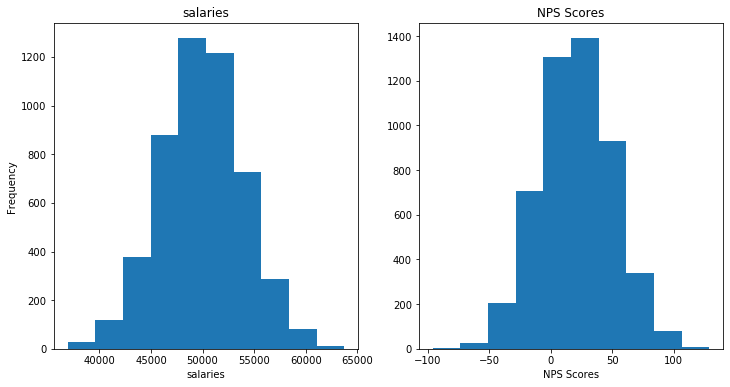

In [14]:
# plot for raw salaries and NPS Score data goes here
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax1.hist(df2['salaries'])
ax1.set_xlabel('salaries')
ax1.set_ylabel('Frequency')
ax1.set_title('salaries')
ax2.hist(df2['NPS Score'])
ax2.set_xlabel('NPS Scores')
ax2.set_title('NPS Scores')
plt.show()

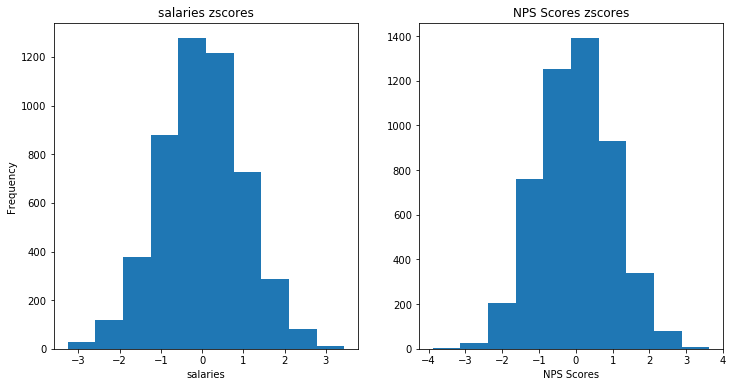

In [15]:
# plot for zscores for salaries and NPS Score data goes here
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax1.hist(df2['salaries_zscores'])
ax1.set_xlabel('salaries')
ax1.set_ylabel('Frequency')
ax1.set_title('salaries zscores')
ax2.hist(df2['NPS Score_zscores'])
ax2.set_xlabel('NPS Scores')
ax2.set_title('NPS Scores zscores')
plt.show()

# Part 4 - PMF
using the column 'eventOutcomes'

create a PMF and plot the PMF as a bar chart

See image below for referenc

<img src="solutions/images/part4_pmf.png"/>

In [16]:
n,m = np.histogram(df2['eventOutcome'])
probs = []
for i in n:
    if i != 0:
        probs.append(i/5000)
probs

[0.1248, 0.1216, 0.1184, 0.1272, 0.1332, 0.1182, 0.1244, 0.1322]

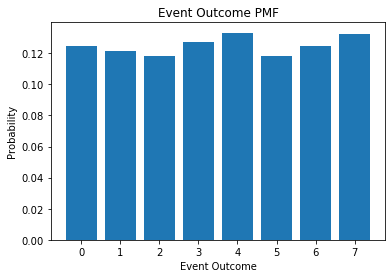

In [17]:
plt.bar(x=np.arange(0,8,1),
       height=probs)
plt.xlabel('Event Outcome')
plt.ylabel('Probability')
plt.title('Event Outcome PMF')
plt.show()

# Part 5 - CDF
plot the CDF of Event Outcomes as a scatter plot using the information above

See image below for reference 

<img src="solutions/images/part5_cmf.png"/>

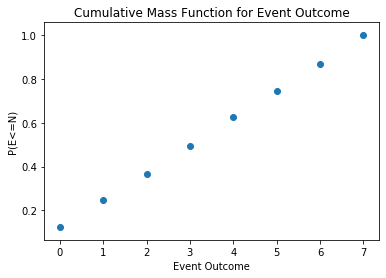

In [18]:
cmf = np.cumsum(probs)
plt.scatter(x=np.arange(0,8,1),
           y=cmf)
plt.xlabel('Event Outcome')
plt.ylabel('P(E<=N)')
plt.title('Cumulative Mass Function for Event Outcome')
plt.show()

# Level Up:
* using np.where find salaries with zscores <= -2.0

* calculate the skewness and kurtosis for the NPS Score column

* plot the pdf and cdf of a given distribution

In [19]:
# find salaries with zscores <= 2.0
z_less = np.where(df2['salaries_zscores'] <= -2)
df2.iloc[z_less]

,salaries,NPS Score,eventOutcome,salaries_zscores,NPS Score_zscores,eventOutcome_zscores
20,39383.0,47.0,1,-2.642533,0.891748,-1.103276
41,38063.0,2.0,5,-2.972528,-0.612719,0.637182
89,41458.0,65.0,7,-2.123791,1.493535,1.507411
107,40854.0,27.0,4,-2.274789,0.223096,0.202067
285,40886.0,43.0,5,-2.266789,0.758018,0.637182
...,...,...,...,...,...,...
4692,38341.0,37.0,3,-2.903029,0.557422,-0.233047
4707,41813.0,96.0,1,-2.035042,2.529946,-1.103276
4731,41184.0,21.0,0,-2.192290,0.022500,-1.538391
4765,40108.0,43.0,2,-2.461286,0.758018,-0.668162


In [20]:
# calculate skewness and kurtosis of NPS Score column
import scipy.stats as stats
print('Skewness: {}'.format(stats.skew(df2['NPS Score'])))
print('Kurtosis: {}'.format(stats.kurtosis(df2['NPS Score'])))

Skewness: 0.02450527688165856
Kurtosis: -0.04212714461681166


# Plotting a pdf and cdf of a normal distribution
A survey is taken that finds that students send an mean average of 80 DMs a day with a standard deviation of 6 DMS. 

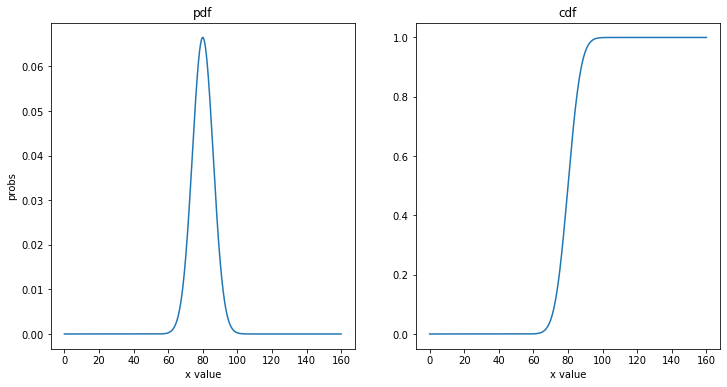

In [21]:
# plot the pdf and cdf of this normal distribution. level up if you can do it in subplots
x = np.linspace(0,160,1000)
pdf = stats.norm.pdf(x,80,6)
cdf = stats.norm.cdf(x,80,6)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax1.plot(x,pdf)
ax1.set_title('pdf')
ax1.set_xlabel('x value')
ax1.set_ylabel('probs')
ax2.plot(x,cdf)
ax2.set_title('cdf')
ax2.set_xlabel('x value')
plt.show()

In [22]:
# what is the probability of drawing a student that sends at least 82 DMs a day?
1 - stats.norm.cdf(82, 80, 6)

0.36944134018176367

A second survey is taken at another bootcamp that shows that students send a mean average of
80 DMs a day, but they have a standard deviation of 9 DMS.  

In [23]:
# What is the difference in the probability of finding a student that sends, at most, 65 DMs a day?
print('probs of std 6: {}'.format(stats.norm.cdf(65, 80, 6)))
print('probs of std 9: {}'.format(stats.norm.cdf(65, 80, 9)))
print('Difference: {}'.format(abs(stats.norm.cdf(65, 80, 6)-stats.norm.cdf(65, 80, 9))))

probs of std 6: 0.006209665325776132
probs of std 9: 0.0477903522728147
Difference: 0.04158068694703857


# run the cell below to convert your notebook to a README for assessment

In [24]:
!jupyter nbconvert --to markdown assessment.ipynb && mv assessment.md README.md

[NbConvertApp] Converting notebook assessment.ipynb to markdown
[NbConvertApp] Support files will be in assessment_files/
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Writing 12110 bytes to assessment.md
